In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv('.../train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data = train_data.drop(['PassengerId','Ticket','Cabin'], axis=1)
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

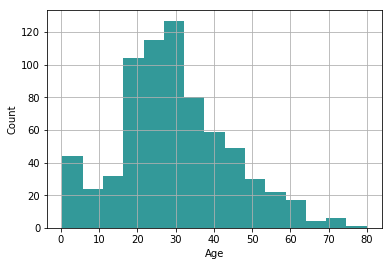

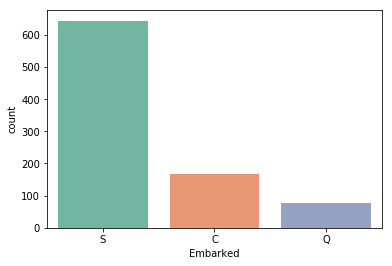

In [4]:
ax = train_data["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()
sns.countplot(x='Embarked', data=train_data, palette='Set2')
plt.show()

In [5]:
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)  # As data is skewed, median would be a better representation than mean
train_data["Embarked"].fillna("S", inplace=True) # As the missing data is very less and 'S' is the most common port
train_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [6]:
# modification based on a peek into the data
train_data.loc[train_data['Sex'] == 'male','Sex'] = 0
train_data.loc[train_data['Sex'] == 'female','Sex'] = 1
train_data['TravelBuds']=train_data["SibSp"]+train_data["Parch"]
train_data['TravelAlone']=np.where(train_data['TravelBuds']>0, 1, 0)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.drop('TravelBuds', axis=1, inplace=True)

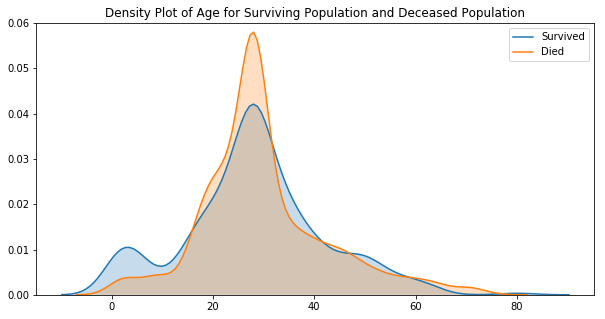

In [8]:
# Age
plt.figure(figsize=(10,5))
sns.kdeplot(train_data["Age"][train_data.Survived == 1], shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 0], shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.ylim(0,0.06)
plt.show()

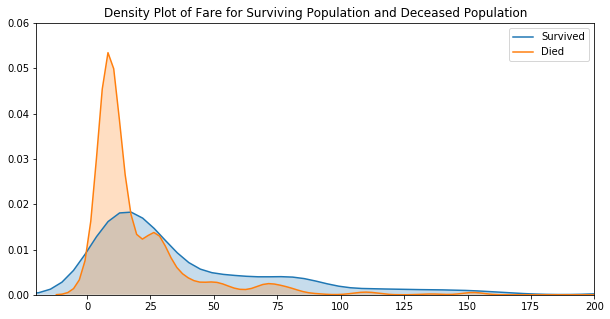

In [9]:
# Fare
plt.figure(figsize=(10,5))
sns.kdeplot(train_data["Fare"][train_data.Survived == 1], shade=True)
sns.kdeplot(train_data["Fare"][train_data.Survived == 0], shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.ylim(0,0.06)
plt.show()

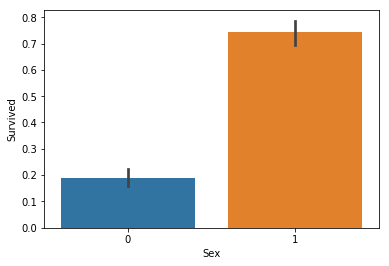

In [10]:
# Sex
sns.barplot('Sex', 'Survived', data=train_data)
plt.show()

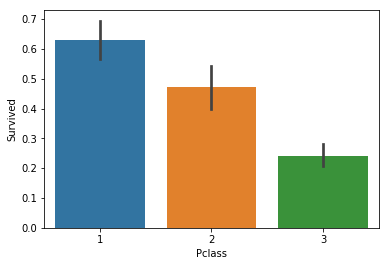

In [11]:
# Pclass
sns.barplot('Pclass', 'Survived', data=train_data)
plt.show()

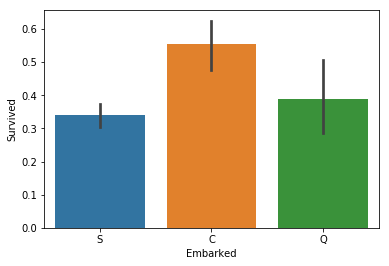

In [12]:
# Port of Embarkment
sns.barplot('Embarked', 'Survived', data=train_data)
plt.show()

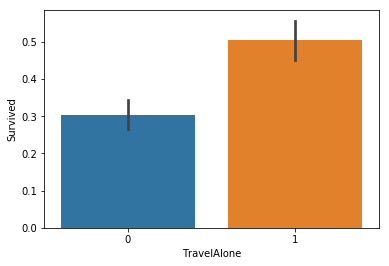

In [13]:
# Travel Alone
sns.barplot('TravelAlone', 'Survived', data=train_data)
plt.show()

In [14]:
# Feature engineering
train_data_title = [i.split(",")[1].split(".")[0].strip() for i in train_data["Name"]]
train_data["Title"] = pd.Series(train_data_title)
train_data["Title"] = train_data["Title"].replace(['Lady','the Countess','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
train_data["Title"] = train_data["Title"].map({"Master":2, "Miss":3, "Ms" : 3, "Mme":3, "Mlle":3, "Mrs":3, "Rare":1, "Mr":0})
train_data = train_data.drop(['Name'], axis=1)
train_data.loc[train_data['Embarked'] == 'S','Embarked'] = 1
train_data.loc[train_data['Embarked'] == 'Q','Embarked'] = 2
train_data.loc[train_data['Embarked'] == 'C','Embarked'] = 3
train_data.loc[train_data['Age'] < 18,'Age'] = 4
train_data.loc[(train_data['Age'] > 30) & (train_data['Age'] < 60),'Age'] = 3
train_data.loc[train_data['Age'] >= 60,'Age'] = 2
train_data.loc[(train_data['Age'] >= 18) & (train_data['Age'] <= 30),'Age'] = 1
train_data['Age'] = train_data['Age'].astype(int)
train_data.loc[train_data['Fare'] < 20,'Fare'] = 0
train_data.loc[train_data['Fare'] >= 20,'Fare'] = 1
train_data['Fare'] = train_data['Fare'].astype(int)

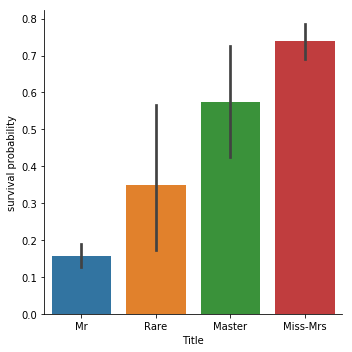

In [15]:
# Title
g = sns.catplot(x="Title",y="Survived",data=train_data,kind="bar")
g = g.set_xticklabels(["Mr","Rare","Master","Miss-Mrs"])
g = g.set_ylabels("survival probability")
plt.show()

In [16]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone,Title
0,0,3,0,1,0,1,1,0
1,1,1,1,3,1,3,1,3
2,1,3,1,1,0,1,0,3
3,1,1,1,3,1,1,1,3
4,0,3,0,3,0,1,0,0


In [17]:
test_data = pd.read_csv('.../test.csv')
test_data = test_data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
test_data.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [18]:
test_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_data["Fare"].median(skipna=True), inplace=True)
test_data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
# applying train data modification to test data
test_data.loc[test_data['Sex'] == 'male','Sex'] = 0
test_data.loc[test_data['Sex'] == 'female','Sex'] = 1
test_data['TravelBuds']=test_data["SibSp"]+test_data["Parch"]
test_data['TravelAlone']=np.where(test_data['TravelBuds']>0, 1, 0)
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)
test_data.drop('TravelBuds', axis=1, inplace=True)
test_data.loc[test_data['Embarked'] == 'S','Embarked'] = 1
test_data.loc[test_data['Embarked'] == 'Q','Embarked'] = 2
test_data.loc[test_data['Embarked'] == 'C','Embarked'] = 3

test_data_title = [i.split(",")[1].split(".")[0].strip() for i in test_data["Name"]]
test_data["Title"] = pd.Series(test_data_title)
test_data["Title"] = test_data["Title"].replace(['Lady','the Countess','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
test_data["Title"] = test_data["Title"].map({"Master":2, "Miss":3, "Ms" : 3, "Mme":3, "Mlle":3, "Mrs":3, "Rare":1, "Mr":0})
test_data = test_data.drop(['Name'], axis=1)
test_data.loc[test_data['Age'] < 18,'Age'] = 4
test_data.loc[(test_data['Age'] > 30) & (test_data['Age'] < 60),'Age'] = 3
test_data.loc[test_data['Age'] >= 60,'Age'] = 2
test_data.loc[(test_data['Age'] >= 18)  & (train_data['Age'] <= 30),'Age'] = 1
test_data['Age'] = test_data['Age'].astype(int)
test_data.loc[test_data['Fare'] < 20,'Fare'] = 0
test_data.loc[test_data['Fare'] >= 20,'Fare'] = 1
test_data['Fare'] = test_data['Fare'].astype(int)

test_data.head()

,Pclass,Sex,Age,Fare,Embarked,TravelAlone,Title
0,3,0,3,0,2,0,0
1,3,1,3,0,1,1,3
2,2,0,2,0,2,0,0
3,3,0,1,0,1,0,0
4,3,1,1,0,1,1,3


In [20]:
X = train_data.drop(['Survived'], axis = 1)
y = train_data['Survived']
X.shape, y.shape

((891, 7), (891,))

In [21]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.319, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_cv, y_cv)))

Accuracy of logistic regression classifier on test set: 0.7895


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
# svm
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.319, random_state=1)
svc = SVC(C = 30, gamma = 0.01)
svc.fit(X_train, y_train) 

print('Accuracy of SVM on test set: {:.4f}'.format(svc.score(X_cv, y_cv)))

Accuracy of SVM on test set: 0.7895


In [24]:
# Submission
X_test = test_data
y_pred = svc.predict(X_test)
test = pd.read_csv('.../test.csv') 
my_submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
my_submission.to_csv('submission.csv', index=False)

## Accuracy on the real datasets

Logistic Regression before Feature Engineering - 0.76076<br>
Logistic Regression after Feature Engineering  - 0.76555<br>
Linear SVM before Feature Engineering - 0.66985<br>
Linear SVM after Feature Engineering  - 0.78468<br>